# Assignment 1. Linear regression

### Find a complex dataset (20+ features), diverse enough (there are both numeric and categorical features), and interesting for you. Here I am taking **KING COUNTY HOUSE SALES DATASETS** from **KAGGLE** which has **21 features.**

## Importing Essentail Libraries

In [664]:
import os
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score

### Loading the dataset using pandas

---



In [665]:
# Check if dataset exists
data_path = "house_datas.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The dataset file '{data_path}' was not found.")

In [666]:
data = pd.read_csv(data_path)
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Build a linear regression for one numeric variable of your choice.
---



In [667]:
# Select the feature (X) and target variable (y)
X = data['sqft_living'].values.reshape(-1, 1)
y = data['price'].values

### Splitting the datasets into training and testing

In [668]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the model with Linear Regresssion



In [669]:
model = LinearRegression()

### Here we are fitting the model with training dataset

In [670]:
fit = model.fit(X_train, y_train)
print(fit)

LinearRegression()


## Then we are testing the model

---




In [671]:
y_test_pred = model.predict(X_test)

### Here we are calculating the Mean sqaure error

In [672]:
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Square error is:", mse_test)


Mean Square error is: 76484977061.77612


### Printing the weight and intercept

In [673]:
Coeff = model.coef_
Intercept = model.intercept_
print("Coefficients (Weights):", Coeff)
print("Intercept:",Intercept)

Coefficients (Weights): [279.55477932]
Intercept: -41999.1860399358


### Ploting the linear regression line on the testing data.

---



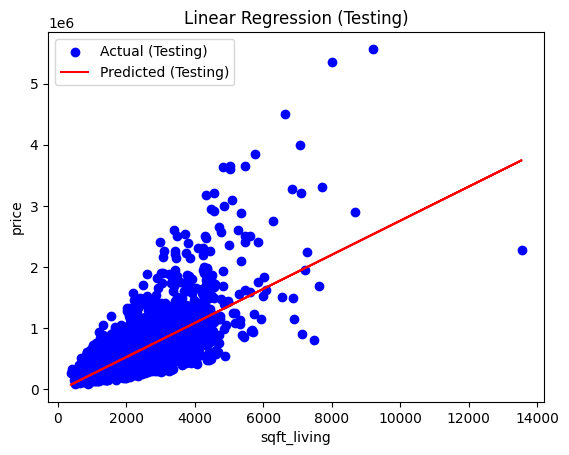

In [674]:
plt.scatter(X_test, y_test, color='blue', label='Actual (Testing)')
plt.plot(X_test, y_test_pred, color='red', label='Predicted (Testing)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear Regression (Testing)')
plt.legend()
plt.show()

# Build k-nn regression for it. Compare your results

### Preprocessing

In [675]:

# Drop irrelevant columns or columns with non-numeric values
data = data.drop(['date'], axis=1)

### # Split the data into features (X) and target variable (y)

In [676]:
X = data.drop('price', axis=1)
y = data['price']

In [677]:
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

### Splitting the datasets into training and testing

In [678]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [679]:
# Scale the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Build the k-nearest neighbors regression model

In [680]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)

In [681]:
#  Train the model
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [682]:
#Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

### Evaluating the Model

In [683]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 32794179642.909943


### Plot actual prices vs. predicted prices


---


---



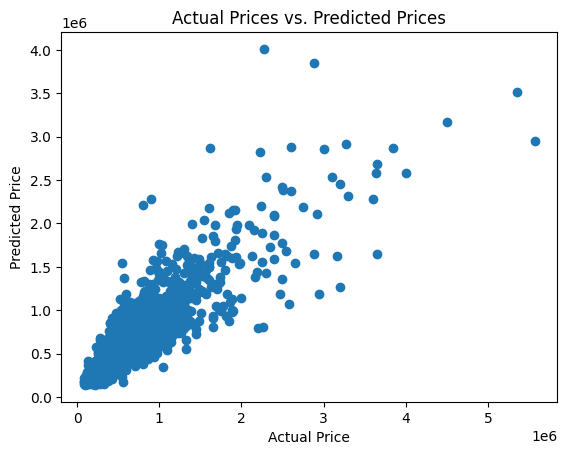

In [684]:
# Plot actual prices vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### Result: We can observe mean square error is less in Knn-regression when comparing to Linear regression

## Logistic regression

#### Choose a binary variable in your data. If the only reasonable variable to work with is your target, split your target into two categories and work with a new variable.

In [685]:
# Define the threshold for classifying prices as high or low
threshold = 500000

In [686]:
# Convert price to binary labels based on the threshold
data['label'] = np.where(data['price'] >= threshold, 'High', 'Low')

# Encode labels as 0 and 1
data['label_encoded'] = np.where(data['label'] == 'High', 1, 0)

In [687]:
# Select the features and target variable
X = data.drop(['id', 'price', 'label', 'label_encoded'], axis=1)
y = data['label_encoded']


### Split the data into training and testing setst

In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [689]:
# Scale the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the logistic regression model

In [690]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)


In [691]:
# Calculate predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

In [692]:
# Find the threshold that maximizes recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
optimal_threshold_recall = thresholds[np.argmax(recall)]


In [693]:
# Find the threshold that maximizes F1 score
f1_scores = [f1_score(y_test, y_pred_prob >= t) for t in thresholds]
optimal_threshold_f1 = thresholds[np.argmax(f1_scores)]

In [694]:
# Set the optimal thresholds
y_pred_recall = (y_pred_prob >= optimal_threshold_recall).astype(int)
y_pred_f1 = (y_pred_prob >= optimal_threshold_f1).astype(int)

### Evaluating the Model with optimal thresholds and printing values

In [695]:
# Evaluate the model with optimal thresholds
print("Confusion Matrix (Optimal Threshold - Recall):")
print(confusion_matrix(y_test, y_pred_recall))
print("\nClassification Report (Optimal Threshold - Recall):")
print(classification_report(y_test, y_pred_recall, zero_division=1))

print("Confusion Matrix (Optimal Threshold - F1 Score):")
print(confusion_matrix(y_test, y_pred_f1))
print("\nClassification Report (Optimal Threshold - F1 Score):")
print(classification_report(y_test, y_pred_f1, zero_division=1))


Confusion Matrix (Optimal Threshold - Recall):
[[   0 2443]
 [   0 1880]]

Classification Report (Optimal Threshold - Recall):
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2443
           1       0.43      1.00      0.61      1880

    accuracy                           0.43      4323
   macro avg       0.72      0.50      0.30      4323
weighted avg       0.75      0.43      0.26      4323

Confusion Matrix (Optimal Threshold - F1 Score):
[[1957  486]
 [ 196 1684]]

Classification Report (Optimal Threshold - F1 Score):
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      2443
           1       0.78      0.90      0.83      1880

    accuracy                           0.84      4323
   macro avg       0.84      0.85      0.84      4323
weighted avg       0.85      0.84      0.84      4323



# Final assignment for individual projects

##  Use the same dataset that you used in the previous assignments.

In [696]:
house = pd.read_csv("house_datas.csv")

In [697]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [698]:
house.shape

(21613, 21)

In [699]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### To see that our data contains both numerical and categorical values,I am plotting the histogram and below histogram proves it

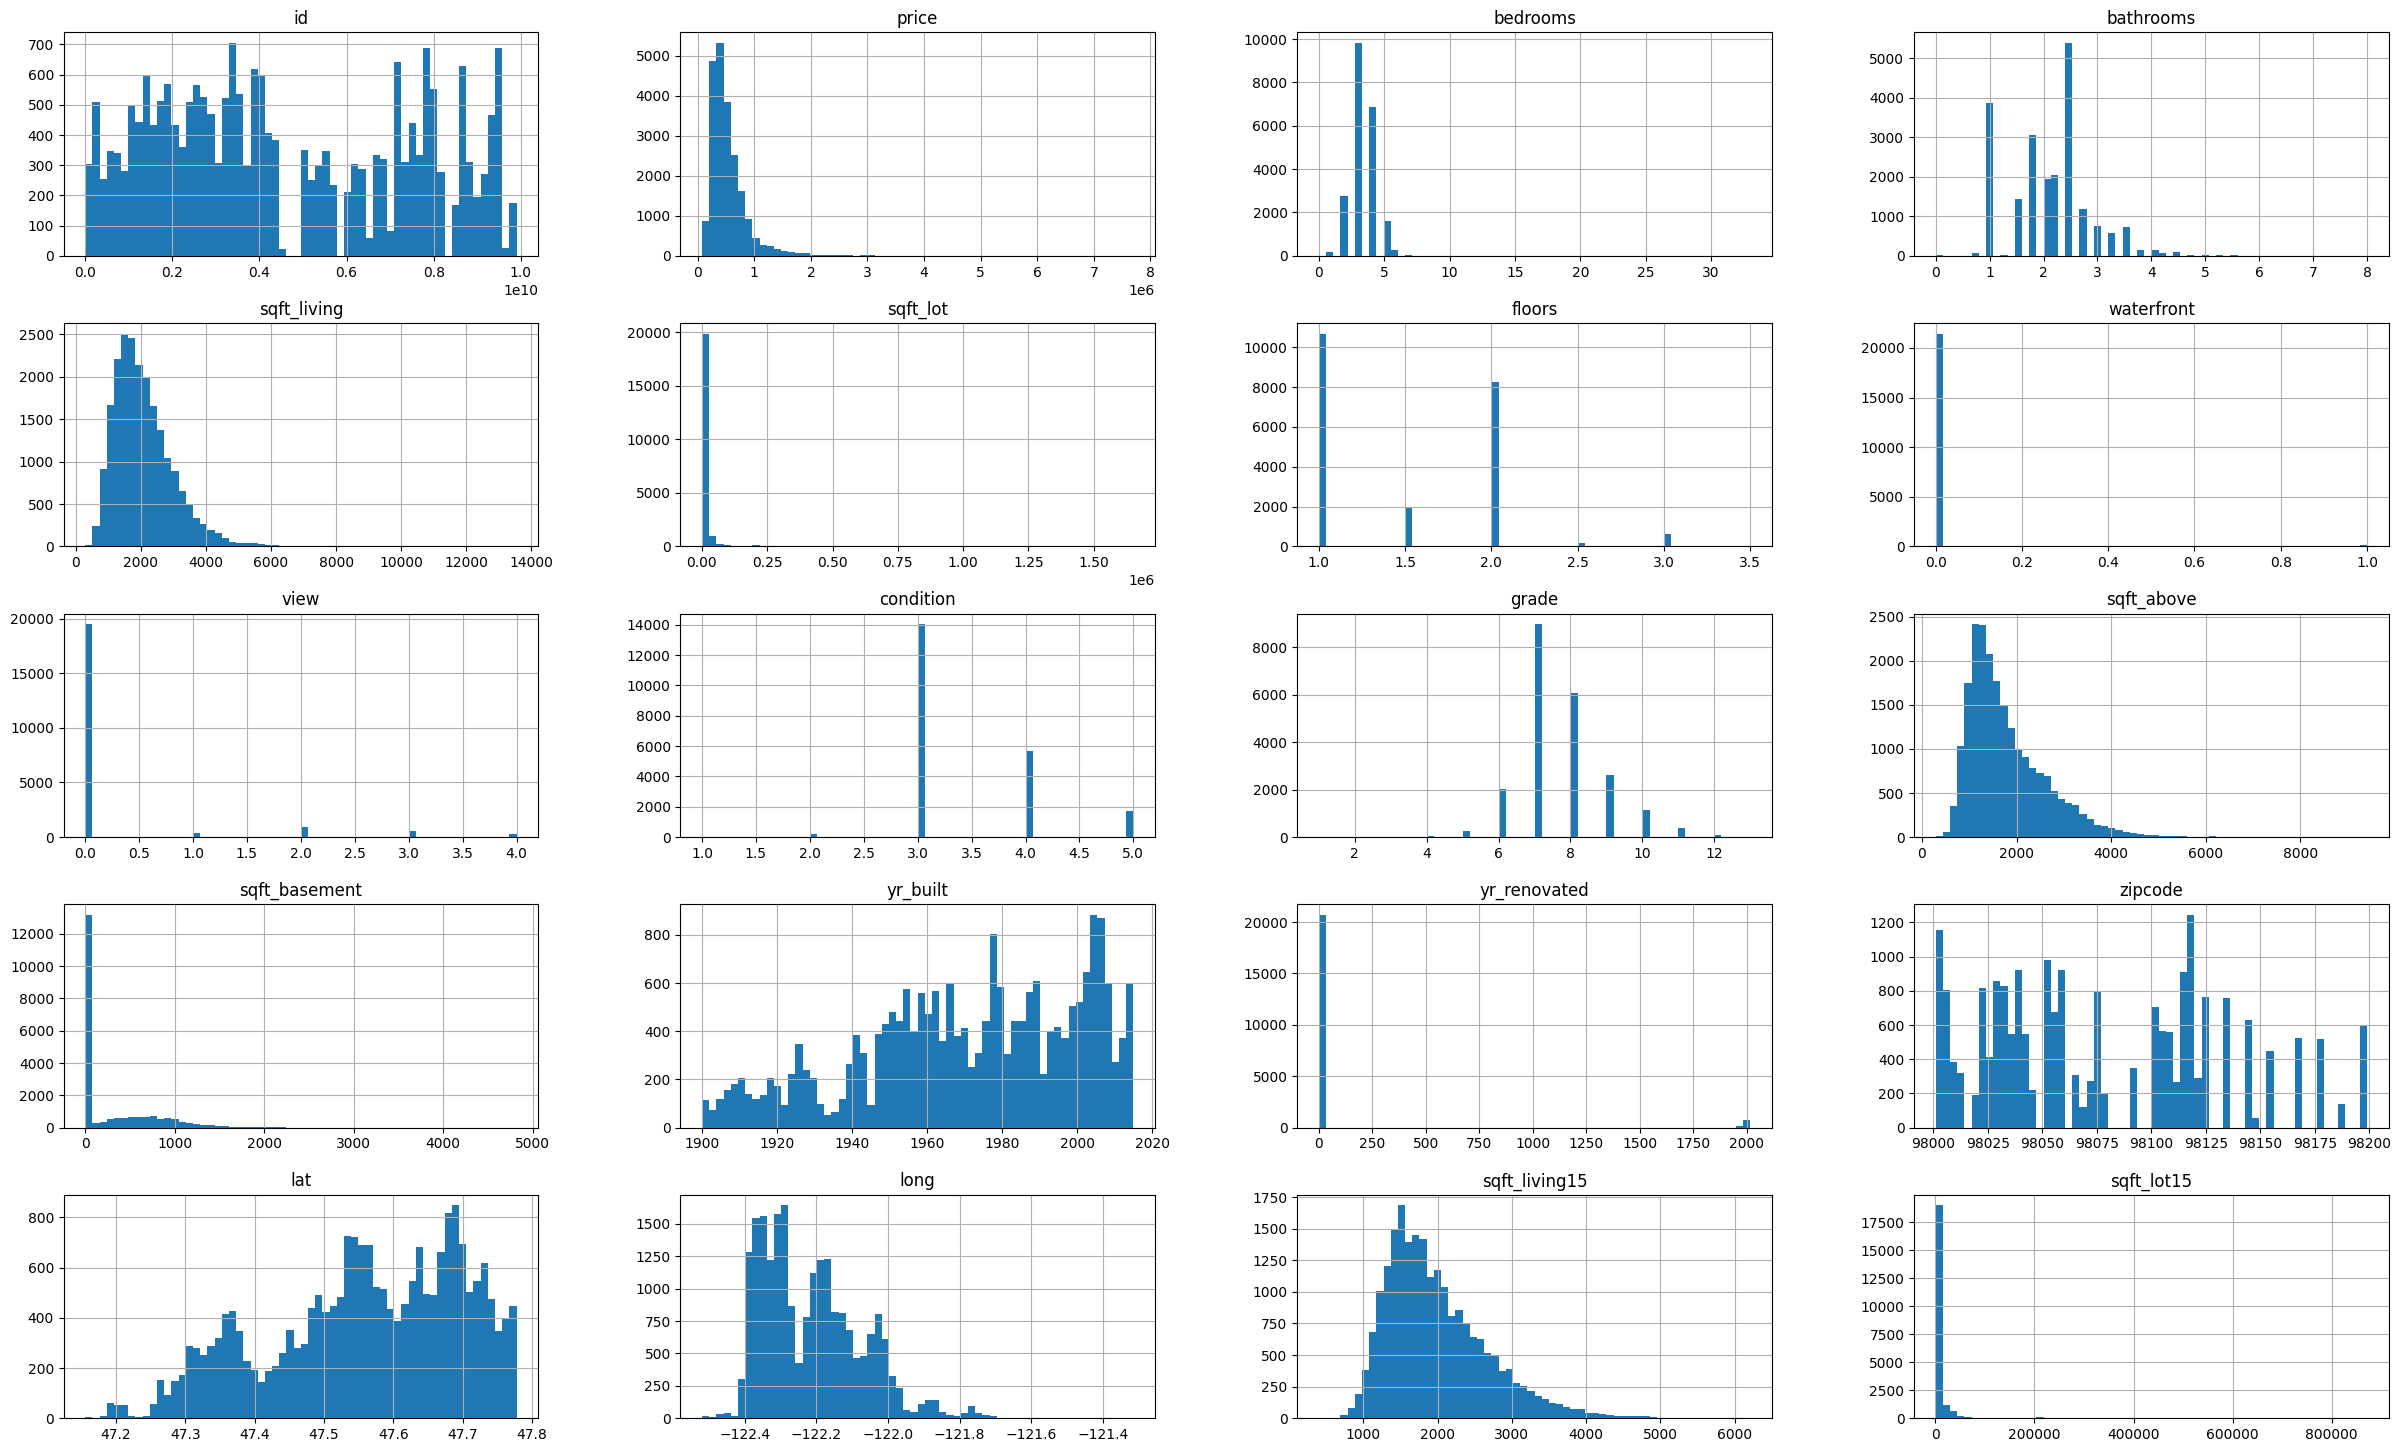

In [700]:
house.hist(bins=60,figsize=(30,18))
plt.show()

## Do the test-train split.

In [701]:
train_set,test_set = train_test_split(house,test_size=0.2,random_state=42)
print("Rows in train set:",len(train_set))
print("Rows in test set:",len(test_set))

Rows in train set: 17290
Rows in test set: 4323


### Here we are performing stratifiedshuffling to the feature **'floor'** and can absorb that both train_set and test_ are nearly equally divided

In [702]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(house,house["floors"]):
    stra_train_set = house.loc[train_index]
    stra_test_set = house.loc[test_index]

In [703]:
stra_test_set["floors"].value_counts()

floors
1.0    2136
2.0    1648
1.5     382
3.0     123
2.5      32
3.5       2
Name: count, dtype: int64

In [704]:
stra_train_set["floors"].value_counts()

floors
1.0    8544
2.0    6593
1.5    1528
3.0     490
2.5     129
3.5       6
Name: count, dtype: int64

In [705]:
2136/1648

1.296116504854369

In [706]:
8544/6593

1.295919915061429

In [707]:
house = stra_train_set.copy()

### Looking for co-relations

In [708]:
corr_matrix = house.corr(numeric_only = True)
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.699054
grade            0.667170
sqft_above       0.605488
sqft_living15    0.588404
bathrooms        0.521114
view             0.399993
sqft_basement    0.316308
bedrooms         0.316155
lat              0.307920
waterfront       0.265583
floors           0.257994
yr_renovated     0.125341
sqft_lot         0.088282
sqft_lot15       0.083184
yr_built         0.054728
condition        0.038290
long             0.019773
id              -0.018992
zipcode         -0.052157
Name: price, dtype: float64

### Plotting the histogram of some important features with label, "price"

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='grade', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>,
        <Axes: xlabel='grade', ylabel='sqft_living'>,
        <Axes: xlabel='bathrooms', ylabel='sqft_living'>],
       [<Axes: xlabel='price', ylabel='grade'>,
        <Axes: xlabel='sqft_living', ylabel='grade'>,
        <Axes: xlabel='grade', ylabel='grade'>,
        <Axes: xlabel='bathrooms', ylabel='grade'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='sqft_living', ylabel='bathrooms'>,
        <Axes: xlabel='grade', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>]], dtype=object)

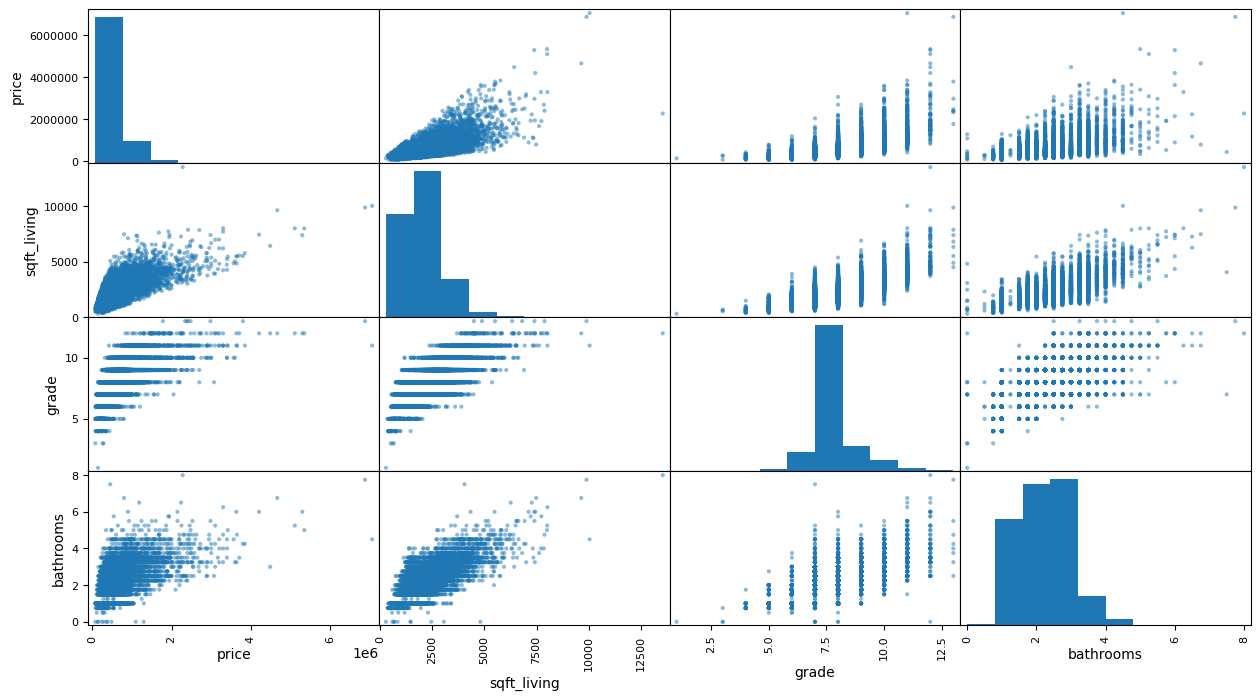

In [709]:
from pandas.plotting import scatter_matrix
attributes = ["price","sqft_living","grade","bathrooms"]
scatter_matrix(house[attributes],figsize = (15,8))

In [710]:
#dropping the label and string data,'date'
house = stra_train_set.drop("price",axis=1)
house_labels = stra_train_set["price"].copy()
house= house.drop("date",axis=1)

## Creating a Pipeline

In [720]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
#     ('imputer',SimpleImputer(strategy = "median"))
    #......add as many a s you want in your  pipeline
    ('std_scaler',StandardScaler()),
])
house_tr = my_pipeline.fit_transform(house)
type(house_tr)

numpy.ndarray

## Selecting a desired model

In [712]:
house.shape

(17290, 19)

In [721]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = KNeighborsRegressor()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(house_tr,house_labels)

RandomForestRegressor()

## Sample a different test set. Return the pipeline again with the same parameters you chose above. Print your error. Is it the same? Is it bigger? Smaller? Explain the result by leaving a comment in the notebook.

In [722]:
some_data = house.iloc[:10]
some_labels = house_labels.iloc[:10]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([ 612842.25,  385707.62,  290366.  ,  439060.4 ,  253800.  ,
        336430.56,  238872.  ,  825554.5 , 1575773.3 ,  538740.71])

In [723]:
list(some_labels)

[604000.0,
 405000.0,
 310000.0,
 443950.0,
 249900.0,
 308000.0,
 240000.0,
 845000.0,
 1695000.0,
 515000.0]

## Evaluating the model

In [728]:
from sklearn.metrics import mean_squared_error
house_predictions = model.predict(house_tr)
lin_mse = mean_squared_error(house_labels,house_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(58445.750801626644)

## Using Better Evaluation Technique- Cross Validation

In [725]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, house, house_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([110690.13547711, 136270.37197287, 125712.61831075, 291259.81099969,
       147330.75270612, 109579.37444297, 135671.2565644 , 121697.71788464,
       152138.59237234, 143247.37613207])

In [726]:
def print_scores(scores):
    print("scores",scores)
    print("Mean:",scores.mean())
    print("Standard deviation is:",scores.std())
print_scores(rmse_scores)

scores [110690.13547711 136270.37197287 125712.61831075 291259.81099969
 147330.75270612 109579.37444297 135671.2565644  121697.71788464
 152138.59237234 143247.37613207]
Mean: 147359.80068629532
Standard deviation is: 49905.6391029655


# Model Outputs:
## Linear Regression


*   Mean: 198544.14507604265
*   Standard deviation is: 19659.202878603955

### KNeighborsRegressor


*   Mean: 290949.4224683675
*   Standard deviation is: 29431.22826941248

### DecisionTreeRegressor

*   Mean: 190128.39469305487
*   Standard deviation is: 19889.292808948125

### RandomForestRegressor
*   Mean: 131068.19033079648
*   Standard deviation is: 14357.886659527498


### **Result:In comparision to all regression model RandomForestRegressor is overall performing well followed by DecisionTreeRegressor, Linear Regression, KNeighborsRegressor**












### Testing the model on test data set

In [727]:
house = stra_test_set.drop("price",axis=1)
house_labels = stra_test_set["price"].copy()
house= house.drop("date",axis=1)
x_test_prepared = my_pipeline.transform(house)
final_pred = model.predict(x_test_prepared)
mse = mean_squared_error(house_labels,final_pred)
rmse = np.sqrt(lin_mse)
print(rmse)

4599416.375970195


# <center><b>Thank You</b></center>